# **Space X  Falcon 9 First Stage Landing Prediction**

## Hands on Lab: Complete the Machine Learning Prediction lab

In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [3]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1 )

In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
data.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object

In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(URL2)

In [7]:
X.head(5)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [8]:
X.dtypes

FlightNumber     float64
PayloadMass      float64
Flights          float64
Block            float64
ReusedCount      float64
                  ...   
GridFins_True    float64
Reused_False     float64
Reused_True      float64
Legs_False       float64
Legs_True        float64
Length: 83, dtype: object

## TASK  1
Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).

In [9]:
Y = data['Class'].to_numpy()

## TASK  2

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.

In [10]:
# students get this 
transform = preprocessing.StandardScaler()

# Fit and transform the data in X, then reassign it to X
X = transform.fit_transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.

## TASK 3
Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.

<code>X_train, X_test, Y_train, Y_test</code>

In [11]:
# Split the data with 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Check the shape of Y_test to confirm the number of test samples
print(Y_test.shape)

(18,)


## TASK  4
Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [12]:
parameters1 ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']} # l1 lasso l2 ridge

In [13]:

lr=LogisticRegression()

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [14]:
# Create the GridSearchCV object
logreg_cv = GridSearchCV(estimator=lr,param_grid= parameters1,scoring='accuracy', cv=10)

 
# Fit the model to the trai=ing data to find the best parameters
logreg_cv.fit(X_train, Y_train)

# Display the best parameters and the best accuracy score on validation data
print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy on validation data:", logreg_cv.best_score_)

Tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy on validation data: 0.8464285714285713


## TASK  5
Calculate the accuracy on the test data using the method <code>score</code>:

In [15]:
# Calculate accuracy on the test data
y_logreg = logreg_cv.best_estimator_.predict(X_test)
logreg_test_accuracy = accuracy_score(Y_test,y_logreg)
print("Accuracy on test data:", logreg_test_accuracy)

Accuracy on test data: 0.8333333333333334


Lets look at the confusion matrix:

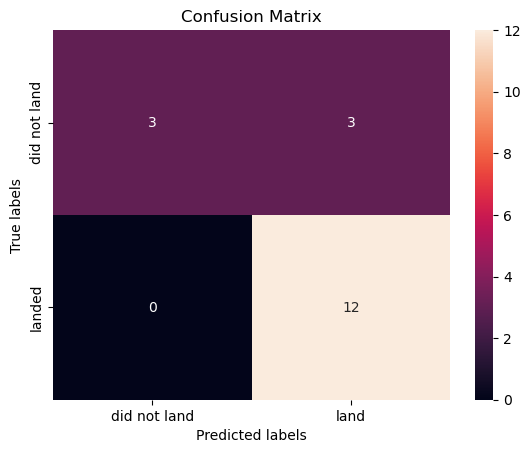

In [16]:

plot_confusion_matrix(Y_test,y_logreg)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)

## TASK  6
Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [17]:
# Define the parameter grid
parameters2 = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

# Create an SVM object
svm = SVC()

In [18]:
# Create the GridSearchCV object with 10-fold cross-validation
svm_cv = GridSearchCV(svm, parameters2, cv=10)

# Fit the model to the training data to find the best parameters
svm_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [19]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)

print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7

Calculate the accuracy on the test data using the method <code>score</code>:


In [20]:
y_svm = svm_cv.predict(X_test)

# Calculate accuracy on the test data
svm_test_accuracy = accuracy_score (Y_test, y_svm)
print("Accuracy on test data:", svm_test_accuracy)




Accuracy on test data: 0.8333333333333334



We can plot the confusion matrix

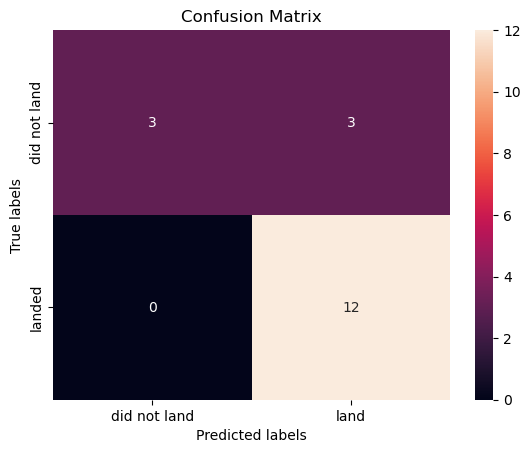

In [21]:
plot_confusion_matrix(Y_test, y_svm)

## TASK 8
Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [22]:
parameters3 = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [23]:
# Create the GridSearchCV object with 10-fold cross-validation
tree_cv = GridSearchCV(tree, parameters3, cv=10)

# Fit the model to the training data to find the best parameters
tree_cv.fit(X_train, Y_train)


C:\Users\pipit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pipit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pipit\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\pipit\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\pipit\anaconda3\Lib\site-pac

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [24]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
accuracy : 0.8892857142857142


## TASK 9
Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:

In [25]:


y_tree = tree_cv.best_estimator_.predict(X_test)

# Calculate accuracy on the test data
tree_test_accuracy = accuracy_score (Y_test, y_tree)
print("Accuracy on test data:", tree_test_accuracy)

Accuracy on test data: 0.7222222222222222


We can plot the confusion matrix

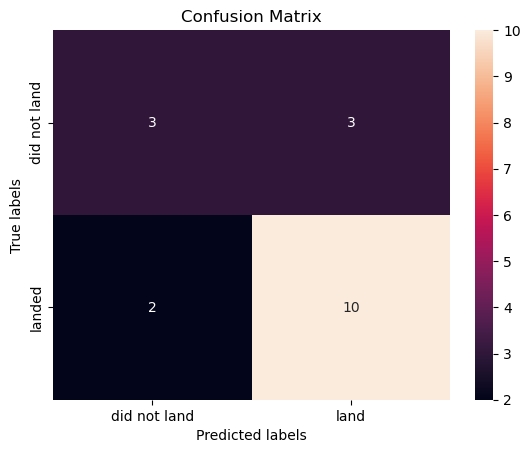

In [26]:

plot_confusion_matrix(Y_test,y_tree)

## TASK 10

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [27]:
parameters4 = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [28]:
# Create a KNeighborsClassifier object
KNN = KNeighborsClassifier()

# Create the GridSearchCV object with 10-fold cross-validation
knn_cv = GridSearchCV(KNN, parameters4, cv=10)

# Fit the model to the training data to find the best parameters
knn_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [29]:
print("Tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("Accuracy :",knn_cv.best_score_)

Tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy : 0.8482142857142858



## TASK  11
Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [30]:
y_knn = knn_cv.predict(X_test)

# Calculate accuracy on the test data
knn_test_accuracy = accuracy_score (Y_test, y_knn)
print("Accuracy on test data:", knn_test_accuracy)

Accuracy on test data: 0.8333333333333334


We can plot the confusion matrix



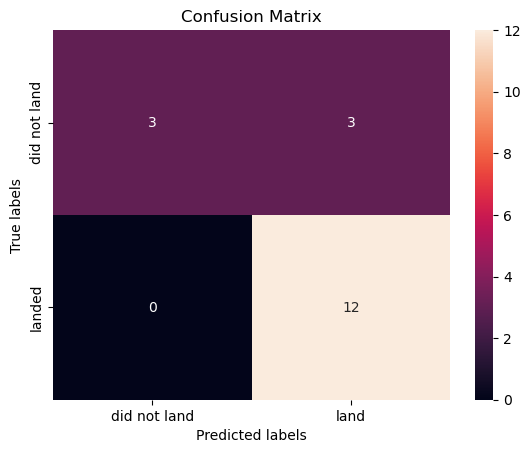

In [31]:
y_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,y_knn)

## TASK 12
Find the method performs best:

In [32]:


# Create a dictionary to hold the accuracies
accuracy_results = {
    'Logistic Regression': logreg_cv.best_score_,
    'Support Vector Machine': svm_cv.best_score_,
    'Decision Tree': tree_cv.best_score_,
    'K-Nearest Neighbors': knn_cv.best_score_
}

# Find the method that performs best
best_method = max(accuracy_results, key=accuracy_results.get)
best_accuracy = accuracy_results[best_method]

# Print the results
print("Model accuracies:")
for model, accuracy in accuracy_results.items():
    print(f"{model}: {accuracy:.4f}")

print(f"\nBest performing model: {best_method} with accuracy: {best_accuracy:.4f}")

Model accuracies:
Logistic Regression: 0.8464
Support Vector Machine: 0.8482
Decision Tree: 0.8893
K-Nearest Neighbors: 0.8482

Best performing model: Decision Tree with accuracy: 0.8893


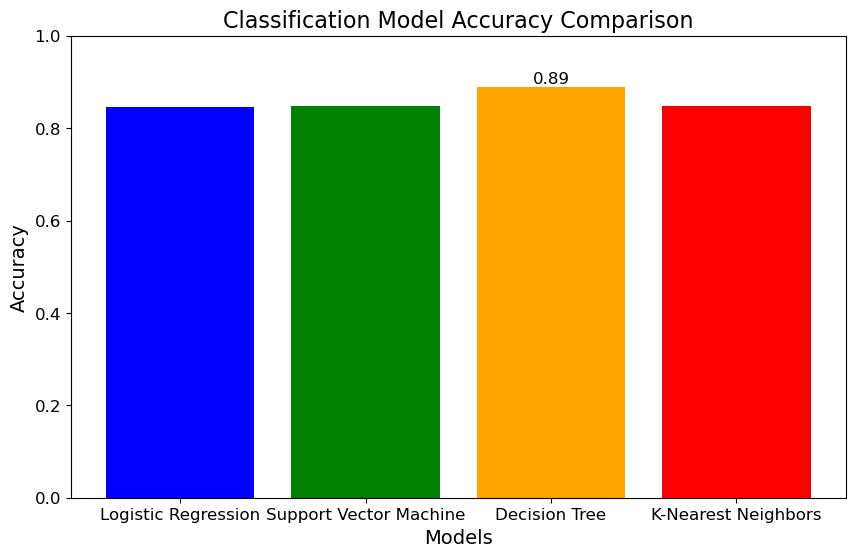

In [33]:
# Accuracy scores for each model
model_accuracies = {
    'Logistic Regression': logreg_cv.best_score_,
    'Support Vector Machine': svm_cv.best_score_,
    'Decision Tree': tree_cv.best_score_,
    'K-Nearest Neighbors': knn_cv.best_score_
}

# Create a bar chart
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Classification Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Adjust based on accuracy range
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Highlight the highest accuracy
max_accuracy_model = max(model_accuracies, key=model_accuracies.get)
max_accuracy = model_accuracies[max_accuracy_model]
plt.text(models.index(max_accuracy_model), max_accuracy, f'{max_accuracy:.2f}', 
         ha='center', va='bottom', fontsize=12, color='black')

plt.show()
